In [45]:
import os
import librosa
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Base directory where "speech" and "song" folders are located
base_dir = "/content"

# Emotion code to label mapping
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "Disgust",
    "08": "Surprised",

}

def extract_label(filename):
    parts = filename.split("-")
    emotion_code = parts[2]  # Third element is emotion code
    return emotion_map.get(emotion_code, "unknown")

def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

features = []
labels = []

# Traversing through both folders
for folder in ["speech", "song"]:
    folder_path = os.path.join(base_dir, folder)
    print(f"Processing folder: {folder_path}")

    # Walking through subdirectories
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".wav"):
                file_path = os.path.join(root, file_name)
                try:
                    label = extract_label(file_name)
                    mfcc_features = extract_mfcc(file_path)
                    features.append(mfcc_features)
                    labels.append(label)
                    print(f"Processed: {file_name} -> Label: {label}")
                except Exception as e:
                    print(f"Error processing {file_name}: {e}")

# Creating and saving the DataFrame
df = pd.DataFrame(features)
df["label"] = labels
df.to_csv("ravdess_features.csv", index=False)
print("✅ Features and labels saved to ravdess_features.csv")


Processing folder: /content/speech
Processed: 03-01-06-02-02-02-17.wav -> Label: fear
Processed: 03-01-05-02-01-01-17.wav -> Label: angry
Processed: 03-01-04-01-01-01-17.wav -> Label: sad
Processed: 03-01-07-02-02-01-17.wav -> Label: Disgust
Processed: 03-01-04-02-02-02-17.wav -> Label: sad
Processed: 03-01-03-02-01-02-17.wav -> Label: happy
Processed: 03-01-06-01-01-01-17.wav -> Label: fear
Processed: 03-01-06-02-01-01-17.wav -> Label: fear
Processed: 03-01-07-02-01-02-17.wav -> Label: Disgust
Processed: 03-01-05-01-01-02-17.wav -> Label: angry
Processed: 03-01-01-01-01-01-17.wav -> Label: neutral
Processed: 03-01-02-02-02-01-17.wav -> Label: calm
Processed: 03-01-03-01-02-01-17.wav -> Label: happy
Processed: 03-01-03-01-01-02-17.wav -> Label: happy
Processed: 03-01-06-01-02-01-17.wav -> Label: fear
Processed: 03-01-04-01-01-02-17.wav -> Label: sad
Processed: 03-01-07-01-01-01-17.wav -> Label: Disgust
Processed: 03-01-05-01-02-01-17.wav -> Label: angry
Processed: 03-01-02-01-02-01-17.

In [51]:

def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

In [52]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


In [53]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [54]:
features[:5]



[array([-4.2513553e+02,  2.8831585e+01, -8.4275885e+00,  5.7389221e+00,
         3.1494353e+00,  4.5526929e+00, -2.9508159e+00, -2.4790559e+00,
        -5.4784489e+00, -3.7851173e-01,  2.8324842e+00, -3.1025507e+00,
         2.6218684e+00,  1.6023767e+00, -1.3074740e+00,  4.7897372e+00,
        -2.7402661e+00,  4.3491869e+00,  3.0785875e+00,  3.0828259e+00,
         5.0799737e+00,  6.2284927e+00,  3.1498008e+00,  5.5682397e+00,
         1.3579576e+00,  4.0396652e+00,  3.2238789e+00,  5.2956491e+00,
         2.0926609e+00,  2.6793587e+00,  2.3870115e+00,  5.8396664e+00,
         4.3154607e+00,  5.6381593e+00,  2.4940078e+00,  3.8186650e+00,
         3.6104472e+00,  3.8781960e+00,  2.4956999e+00,  3.5745227e+00],
       dtype=float32),
 array([-4.4666174e+02,  4.4119839e+01, -1.2628798e+01,  1.1272434e+01,
         6.6586237e+00, -2.3296168e+00,  2.8683324e+00, -1.3336433e+00,
        -7.8111644e+00,  2.7443476e+00, -4.4506083e+00, -3.4525635e+00,
         3.9227836e+00, -3.1782100e+00, 

In [55]:

import os
import pandas as pd

# Emotion map
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "Disgust",
    "08": "Surprised",

}

paths = []
labels = []

for root, _, files in os.walk("/content/speech"):
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            parts = file.split("-")
            if len(parts) > 2:
                label = emotion_map.get(parts[2], "unknown")
                paths.append(full_path)
                labels.append(label)
for root, _, files in os.walk("/content/song"):
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            parts = file.split("-")
            if len(parts) > 2:
                label = emotion_map.get(parts[2], "unknown")
                paths.append(full_path)
                labels.append(label)

# Creating DataFrame with paths
df_paths = pd.DataFrame({
    "speech": paths,
    "label": labels
})


In [56]:
paths[:10]

['/content/speech/Actor_17/03-01-06-02-02-02-17.wav',
 '/content/speech/Actor_17/03-01-05-02-01-01-17.wav',
 '/content/speech/Actor_17/03-01-04-01-01-01-17.wav',
 '/content/speech/Actor_17/03-01-07-02-02-01-17.wav',
 '/content/speech/Actor_17/03-01-04-02-02-02-17.wav',
 '/content/speech/Actor_17/03-01-03-02-01-02-17.wav',
 '/content/speech/Actor_17/03-01-06-01-01-01-17.wav',
 '/content/speech/Actor_17/03-01-06-02-01-01-17.wav',
 '/content/speech/Actor_17/03-01-07-02-01-02-17.wav',
 '/content/speech/Actor_17/03-01-05-01-01-02-17.wav']

In [57]:
labels[:10]

['fear',
 'angry',
 'sad',
 'Disgust',
 'sad',
 'happy',
 'fear',
 'fear',
 'Disgust',
 'angry']

In [58]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

speech    label
0  /content/speech/Actor_17/03-01-06-02-02-02-17.wav     fear
1  /content/speech/Actor_17/03-01-05-02-01-01-17.wav    angry
2  /content/speech/Actor_17/03-01-04-01-01-01-17.wav      sad
3  /content/speech/Actor_17/03-01-07-02-02-01-17.wav  Disgust
4  /content/speech/Actor_17/03-01-04-02-02-02-17.wav      sad

In [59]:
df['label'].value_counts()

label
fear         376
angry        376
sad          376
happy        376
calm         376
Disgust      192
Surprised    192
neutral      188
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

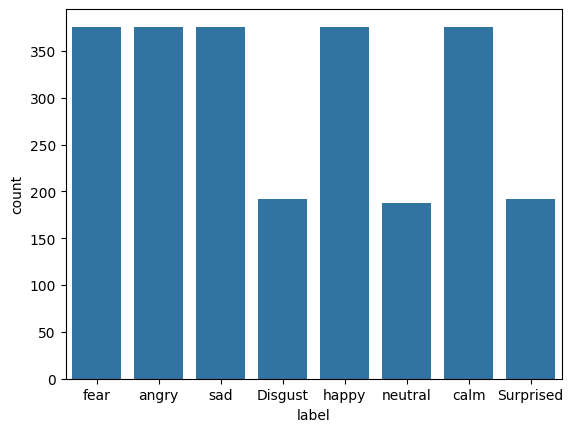

In [60]:
sns.countplot(x='label', data=df)

In [61]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

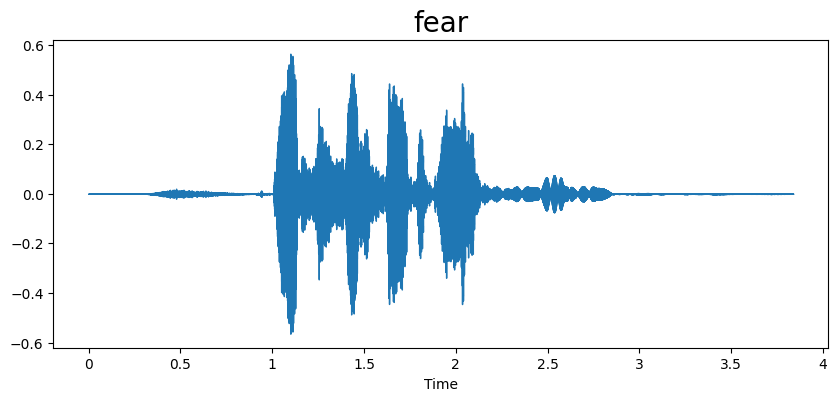

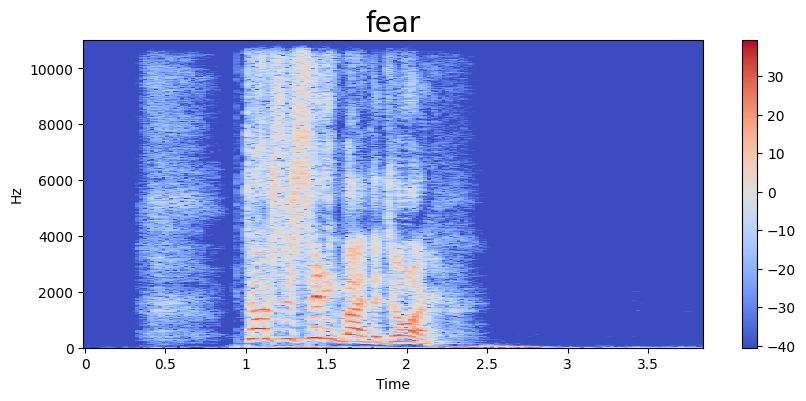

In [62]:
emotion='fear'
path = df[df["label"] == emotion]["speech"].iloc[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [63]:
path = df[df["label"] == emotion]["speech"].iloc[0]
path


'/content/speech/Actor_17/03-01-06-02-02-02-17.wav'

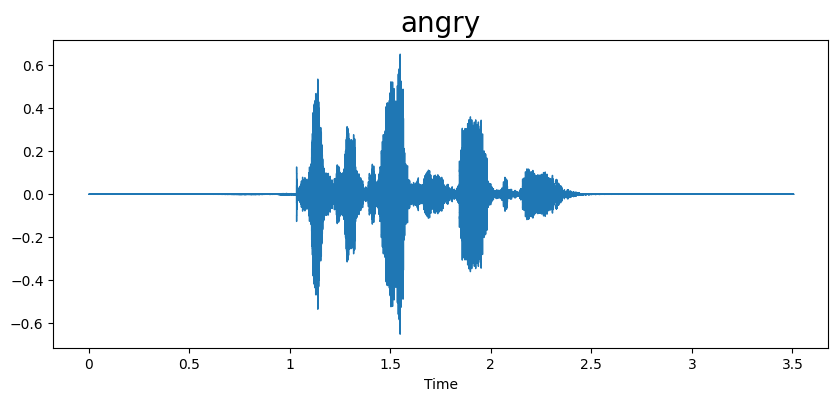

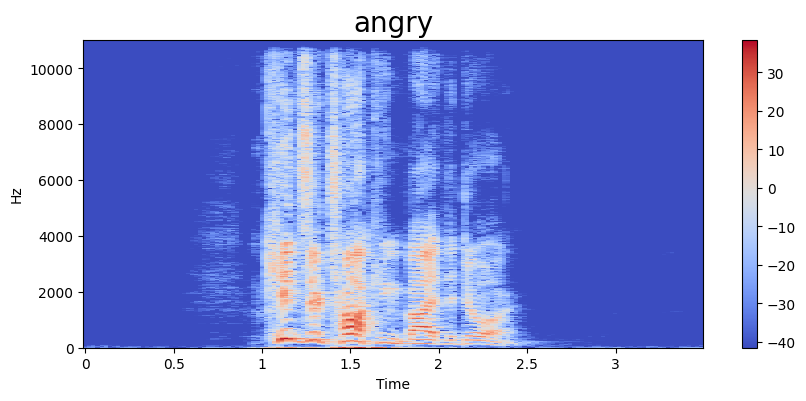

In [64]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


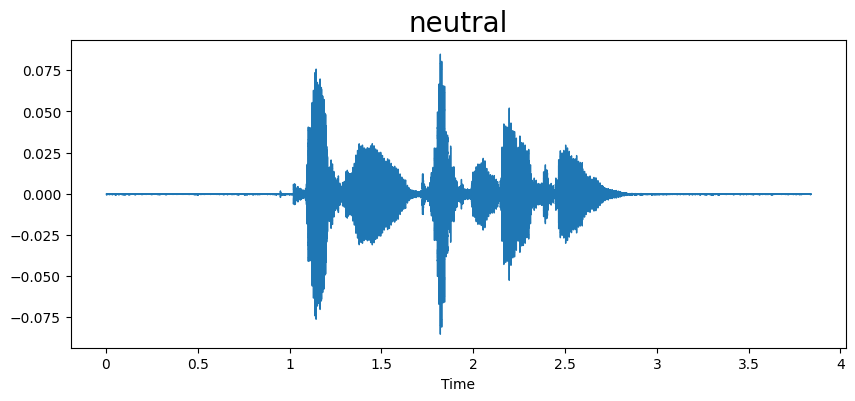

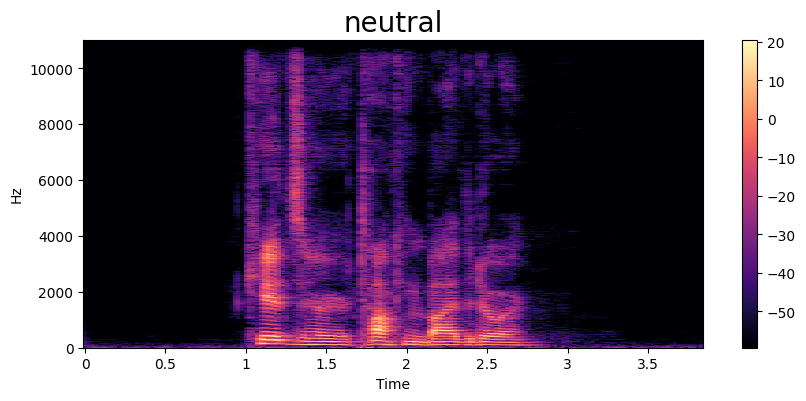

In [65]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

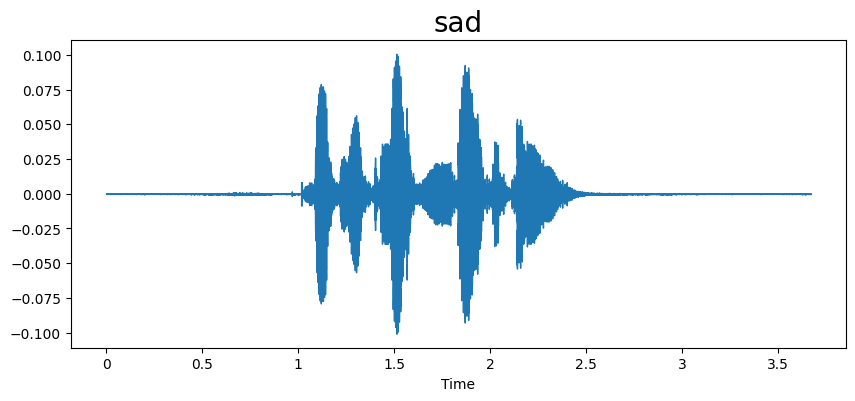

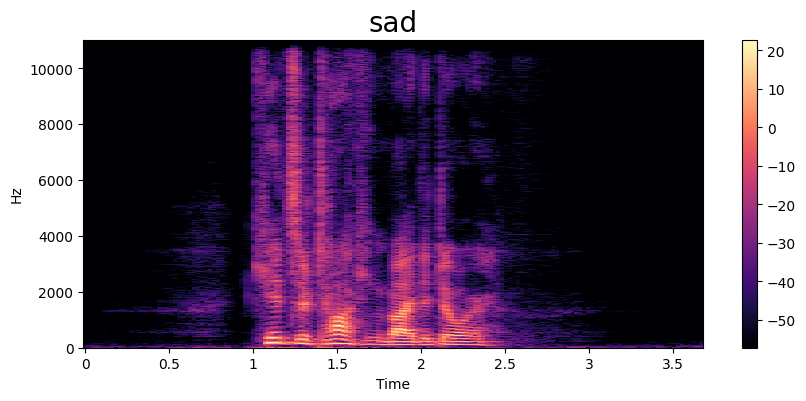

In [66]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

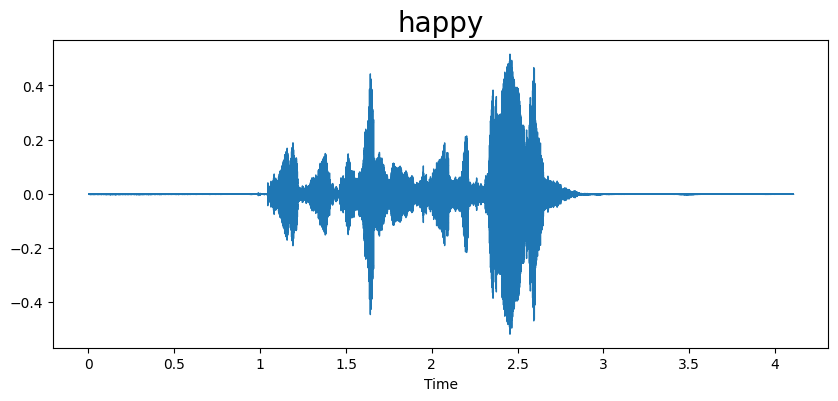

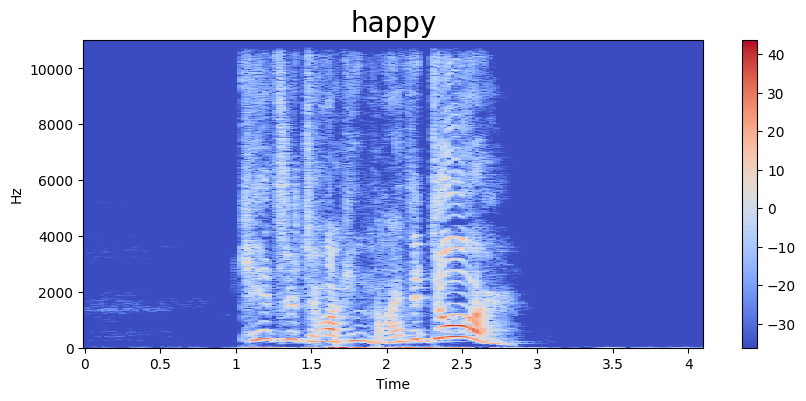

In [67]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

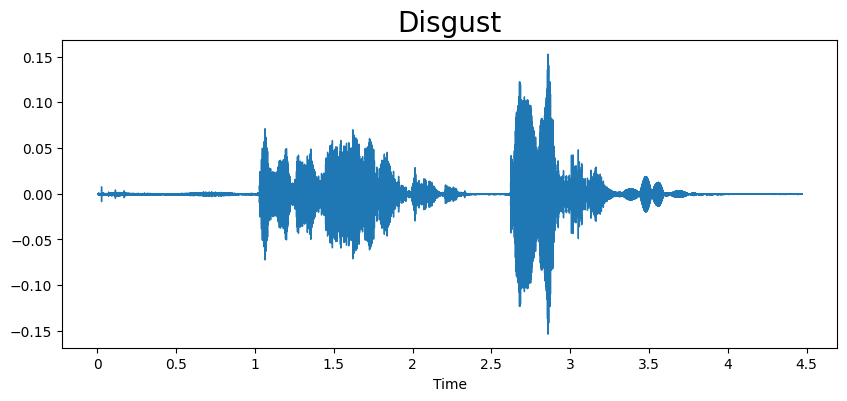

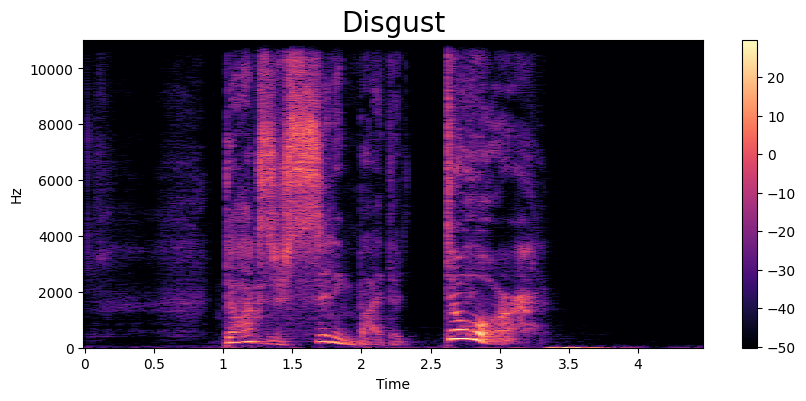

In [68]:
emotion='Disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

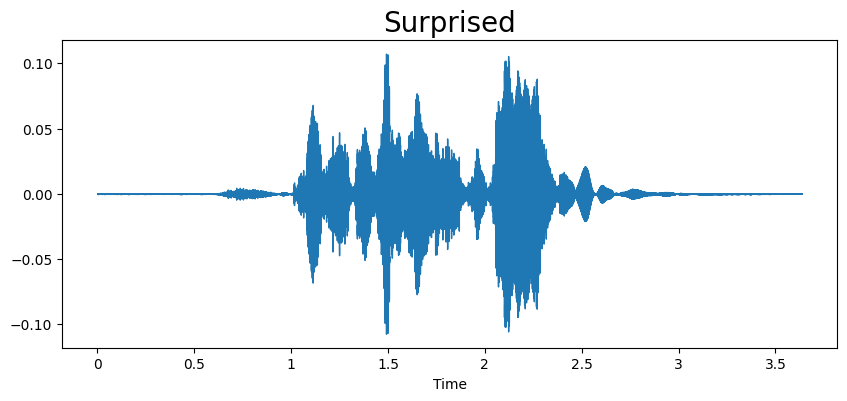

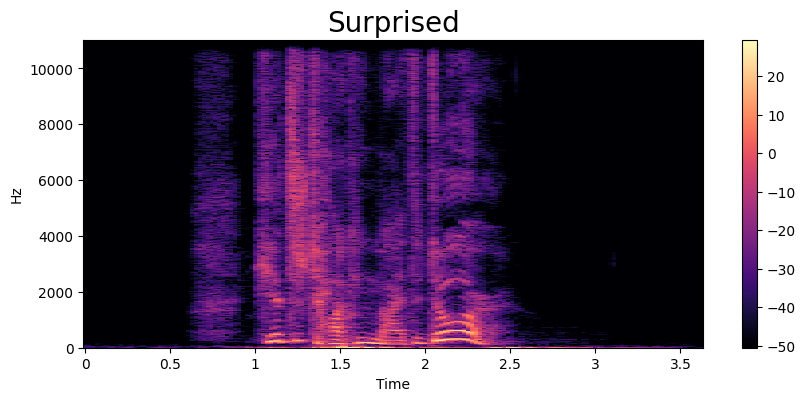

In [69]:
emotion='Surprised'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [70]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [71]:
extract_mfcc(df['speech'][0])

array([-389.73657  ,   36.48952  ,  -10.498124 ,    6.9392824,
          4.0192404,    4.563837 ,   -4.332592 ,   -2.4616313,
         -6.8640776,   -1.121136 ,    2.7742698,   -4.652646 ,
          2.6635911,    0.5515512,   -2.1615193,    4.979943 ,
         -4.4168787,    4.913914 ,    3.2176368,    3.3630273,
          6.0323086,    7.019508 ,    3.3976805,    5.92837  ,
          1.0710503,    4.420351 ,    3.6375859,    5.8731537,
          2.1114388,    3.1179345,    2.9284203,    6.7869806,
          5.022772 ,    6.461857 ,    2.8208697,    4.13702  ,
          4.3164196,    4.728435 ,    2.8489172,    4.3420715],
      dtype=float32)

In [72]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [73]:
X_mfcc

0       [-389.73657, 36.48952, -10.498124, 6.9392824, ...
1       [-426.29932, 51.309406, -15.380491, 12.726267,...
2       [-571.20685, 79.119064, -5.2158155, 13.035667,...
3       [-455.378, 46.65694, 5.8254256, 8.464293, 2.63...
4       [-507.2524, 61.640083, -15.69181, 11.632741, 7...
                              ...                        
2447    [-359.55304, 21.535114, -27.937376, -6.87678, ...
2448    [-415.46014, 24.234793, -20.098104, -5.6889725...
2449    [-368.36392, 25.266691, -27.873318, -4.990305,...
2450    [-406.92688, 23.067772, -22.976295, -7.7370057...
2451    [-434.14056, 15.498597, -18.45883, -9.640216, ...
Name: speech, Length: 2452, dtype: object

In [74]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2452, 40)

In [75]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [76]:
print(y.shape)
y=y.toarray()

(2452, 8)


In [77]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization

model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 36, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 14, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,936 (1.51 MB)

 Trainable params: 396,168 (1.51 MB)

 Non-trainable params: 768 (3.00 KB)

In [78]:

history=model.fit(X,y,validation_split=0.2,epochs=75,batch_size=512,shuffle=True)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.1632 - loss: 3.2795 - val_accuracy: 0.2179 - val_loss: 2.4623
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step - accuracy: 0.2229 - loss: 2.1346 - val_accuracy: 0.1996 - val_loss: 2.0375
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 590ms/step - accuracy: 0.2903 - loss: 1.8792 - val_accuracy: 0.2037 - val_loss: 1.9947
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.3060 - loss: 1.8010 - val_accuracy: 0.2016 - val_loss: 2.1720
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.3362 - loss: 1.7527 - val_accuracy: 0.2118 - val_loss: 2.3019
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.3704 - loss: 1.6765 - val_accuracy: 0.2098 - val_loss: 2.3956
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.3671 - loss: 1.6543 - val_accuracy: 0.2424 - val_loss: 2.4140
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.4072 - loss: 1.5686 - val_accuracy: 0.2525 - val_loss:

In [88]:
model.save('emotion_cnn_model.h5')


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




In [94]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


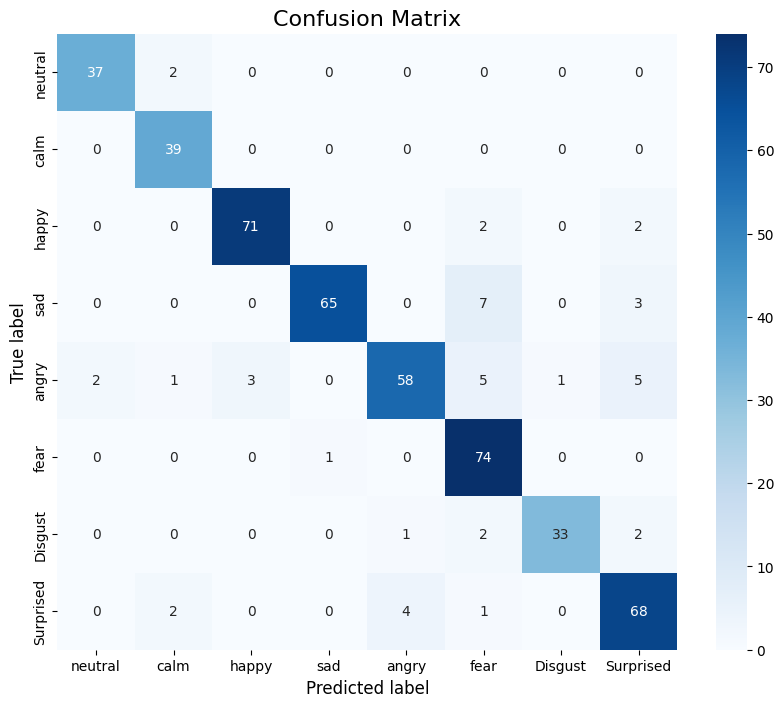


🔍 Classification Report:
              precision  recall  f1-score  support
neutral            0.95    0.95      0.95    39.00
calm               0.89    1.00      0.94    39.00
happy              0.96    0.95      0.95    75.00
sad                0.98    0.87      0.92    75.00
angry              0.92    0.77      0.84    75.00
fear               0.81    0.99      0.89    75.00
Disgust            0.97    0.87      0.92    38.00
Surprised          0.85    0.91      0.88    75.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.92    0.91      0.91   491.00
weighted avg       0.91    0.91      0.91   491.00


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predicting on validation set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'Disgust', 'Surprised']

# Generating confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cr = classification_report(y_true_classes, y_pred_classes, target_names=class_labels, digits=2, output_dict=True)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()

# Printing classification report in table format
from pandas import DataFrame

# Converting classification report to DataFrame
report_df = DataFrame(cr).transpose()

print("\n🔍 Classification Report:")
print(report_df.round(2))


In [96]:

accuracies = np.diag(cm) / cm.sum(axis=1)

emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'Disgust', 'Surprised']

for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")

accuracy of predicting neutral i.e 0 correctly = 94.87%
accuracy of predicting calm i.e 1 correctly = 100.00%
accuracy of predicting happy i.e 2 correctly = 94.67%
accuracy of predicting sad i.e 3 correctly = 86.67%
accuracy of predicting angry i.e 4 correctly = 77.33%
accuracy of predicting fear i.e 5 correctly = 98.67%
accuracy of predicting Disgust i.e 6 correctly = 86.84%
accuracy of predicting Surprised i.e 7 correctly = 90.67%


In [97]:
%%writefile test_model.py
from keras.models import load_model
import numpy as np
import librosa

# Loading the trained model
model = load_model("emotion_model.h5")

# Function to extract features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    return mfcc_scaled.reshape(1, 40, 1)

# Path to test file
file_path = "test_audio.wav"
features = extract_features(file_path)

# Predict
prediction = model.predict(features)
emotion_classes = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'Disgust', 'Surprised']
predicted_class = emotion_classes[np.argmax(pred)]
print("Predicted Emotion:", predicted_class)

Writing test_model.py


In [99]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np

# Loading the trained model
model = load_model("emotion_cnn_model.h5")

y_pred_probs = model.predict(X_test)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Computing overall accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("✅ Overall Model Accuracy: {:.2f}%".format(accuracy * 100))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
✅ Overall Model Accuracy: 90.63%


In [101]:
%%writefile app.py
import streamlit as st
from keras.models import load_model
import numpy as np
import librosa

# Load trained model
model = load_model("emotion_cnn_model.h5")

# Emotion class labels (modify as per your dataset)
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'Disgust', 'Surprised']

# Function to extract features from uploaded audio
def extract_features(file):
    y, sr = librosa.load(file, sr=None, duration=3, offset=0.5)  # 3 sec max
    if len(y) < sr * 3:
        y = np.pad(y, (0, sr*3 - len(y)))  # pad if short
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    return mfcc_scaled.reshape(1, 40, 1)


# Streamlit UI
st.title("🎵 Emotion Classification from Audio")
st.write("Upload a .wav file to predict the emotion.")

uploaded_file = st.file_uploader("Choose a WAV audio file", type=["wav"])

if uploaded_file is not None:
    st.audio(uploaded_file, format='audio/wav')
    features = extract_features(uploaded_file)
    prediction = model.predict(features)
    predicted_class = emotion_labels[np.argmax(prediction)]
    st.success(f"Predicted Emotion: *{predicted_class}*")

Writing app.py
